In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/amazon_sales_data 2025.csv")
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-2025,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-2025,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-2025,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-2025,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-2025,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-2025,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-2025,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-2025,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-2025,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [ ]:
df["Date"]=pd.to_datetime(df["Date"],errors="coerce")
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

/tmp/ipython-input-1862719605.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"]=pd.to_datetime(df["Date"],errors="coerce")


In [ ]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,year,month,day
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled,2025,3,14
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending,2025,3,20
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled,2025,2,15
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending,2025,2,19
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending,2025,3,10


In [ ]:
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


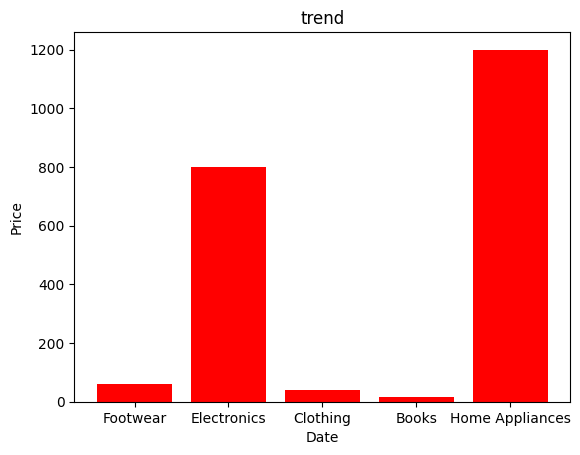

In [ ]:
plt.bar(df["Category"],df["Price"],color="r")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("trend")
plt.show()

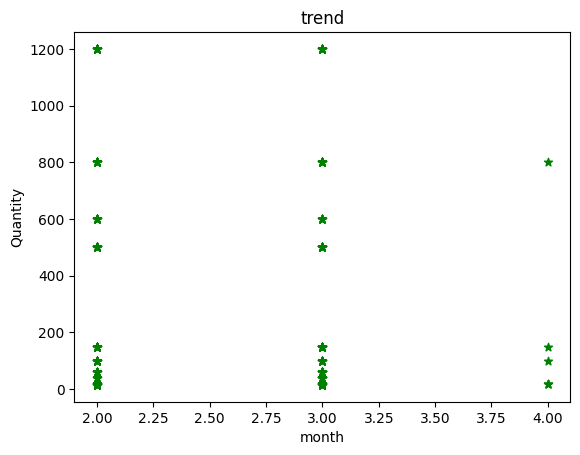

In [ ]:
plt.scatter(df["month"],df["Price"],marker="*",color="g")
plt.xlabel("month")
plt.ylabel("Quantity")
plt.title("trend")
plt.show()

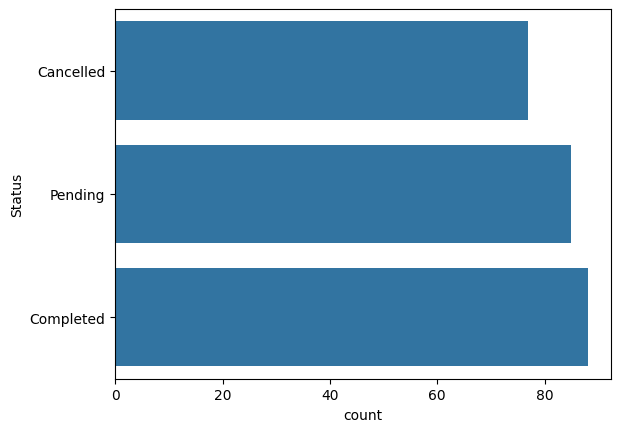

In [ ]:
sns.countplot(df["Status"])
plt.show()

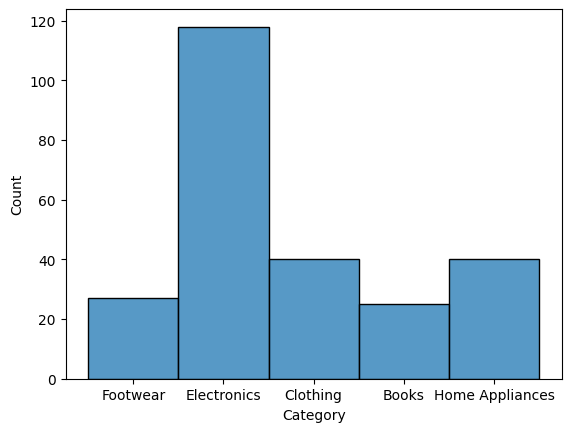

In [ ]:
sns.histplot(df["Category"])
plt.show()

In [ ]:
LE=LabelEncoder()
df["Status"]=LE.fit_transform(df["Status"])

In [ ]:
df.groupby("Category").count()

,Order ID,Date,Product,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,year,month,day
Category,,,,,,,,,,,,,
Books,25,25,25,25,25,25,25,25,25,25,25,25,25
Clothing,40,40,40,40,40,40,40,40,40,40,40,40,40
Electronics,118,118,118,118,118,118,118,118,118,118,118,118,118
Footwear,27,27,27,27,27,27,27,27,27,27,27,27,27
Home Appliances,40,40,40,40,40,40,40,40,40,40,40,40,40


In [ ]:
#df["Product"]=LE.fit_transform(df["Product"])
#df["Category"]=LE.fit_transform(df["Category"])
#df["Payment Method"]=LE.fit_transform(df["Payment Method"])
#df["Customer Location"]=LE.fit_transform(df["Customer Location"])

In [ ]:
X = pd.get_dummies(df[['Product','Category','Payment Method','Customer Location','month','day']],
                   drop_first=True)
y=df["Total Sales"]

In [ ]:
#x=df[["Product","Category","Total Sales","Quantity","Payment Method","Customer Location","month","day"]]
#y=df["Status"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
RC = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)
RC.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=5, random_state=42)

In [ ]:
x_test[:30]

,month,day,Product_Headphones,Product_Jeans,Product_Laptop,Product_Refrigerator,Product_Running Shoes,Product_Smartphone,Product_Smartwatch,Product_T-Shirt,...,Payment Method_PayPal,Customer Location_Chicago,Customer Location_Dallas,Customer Location_Denver,Customer Location_Houston,Customer Location_Los Angeles,Customer Location_Miami,Customer Location_New York,Customer Location_San Francisco,Customer Location_Seattle
142,3,31,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
6,3,18,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
97,2,14,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
60,3,11,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
112,3,19,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181,4,2,False,False,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
197,2,20,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
184,3,22,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
9,3,12,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
104,3,16,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_pred=RC.predict(x_test)
y_pred

array([2680.9047619 ,  484.17996032,  678.51984127, 2784.69047619,
         54.79392857,   76.64628968, 2513.48253968,   61.91378247,
       1048.93632756,  145.07982143,   37.03081349,  169.58833333,
        345.18095238, 1658.11435786,  298.82896825,  127.2511039 ,
       1226.61129149, 3014.70519481, 1782.53643579,   37.62784452,
         72.5460119 ,  400.17142857,  247.84428571, 2902.36233766,
         36.83575036,  125.01666667,  442.51785714,   27.85855159,
       1499.76749639, 1732.65638528, 1608.73214286,   32.22416667,
       1238.70508658,  643.18095238, 2300.41190476, 2168.0952381 ,
        129.19634921,  142.02833333,  182.24904762, 3137.15238095,
        915.66847042,   51.45027778,  111.65654762, 2099.75238095,
        136.44685426,   33.32008658,  122.24880952,   31.33096861,
        354.0297619 , 2175.8       , 2496.75873016,  151.06619048,
        471.86607143, 2657.51111111,  360.24821429,  304.62157287,
        277.73809524, 3174.07424242, 4913.64761905,  320.05927

In [ ]:
df.head(10)

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,year,month,day
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,0,2025,3,14
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,2,2025,3,20
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,0,2025,2,15
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,2,2025,2,19
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,2,2025,3,10
5,ORD0006,2025-03-14,T-Shirt,Clothing,20,1,20,John Doe,Dallas,Credit Card,2,2025,3,14
6,ORD0007,2025-03-18,Smartwatch,Electronics,150,4,600,Emma Clark,Houston,PayPal,1,2025,3,18
7,ORD0008,2025-03-02,Smartphone,Electronics,500,1,500,Sophia Miller,Miami,PayPal,1,2025,3,2
8,ORD0009,2025-03-08,T-Shirt,Clothing,20,3,60,Sophia Miller,Boston,PayPal,1,2025,3,8
9,ORD0010,2025-03-12,Smartphone,Electronics,500,1,500,Emily Johnson,San Francisco,Credit Card,0,2025,3,12


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 849.9541051471068
R-squared: 0.610552745664811


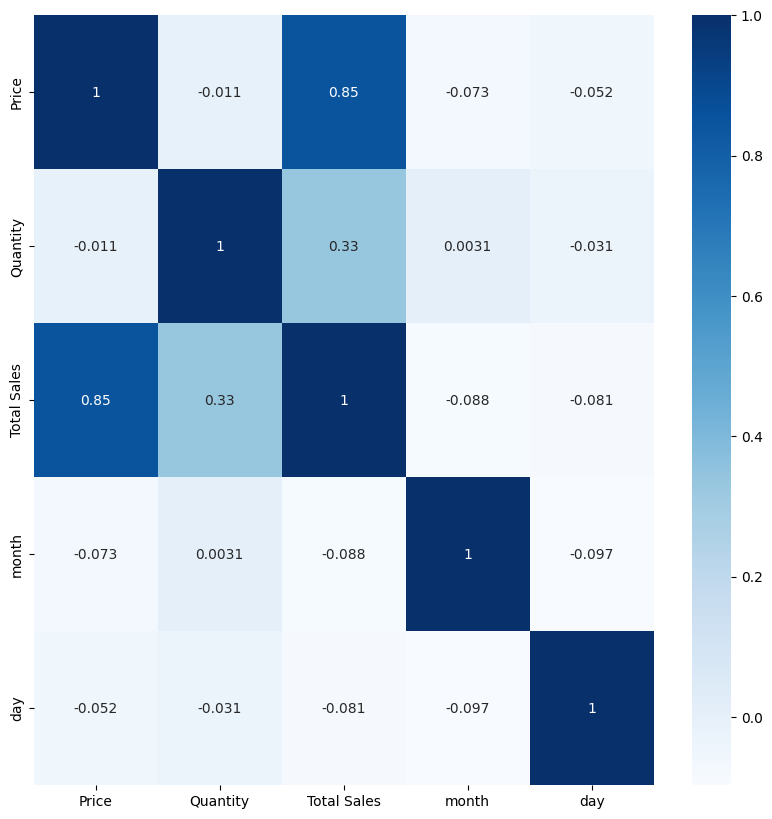

In [ ]:
corr=df[['Price','Quantity','Total Sales','month','day']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(annot=True,data=corr,cmap="Blues")
plt.show()